<a href="https://colab.research.google.com/github/mukslima/PF-Topico/blob/main/Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré processamento
## Avaliação do carro (Car Evaluation)

In [ ]:
# Import necessary libraries
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

# Obter o conjunto de dados de Car Evaluation
car_evaluation = fetch_ucirepo(id=19)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Preprocess the data: Encode categorical features and target, and normalize features
for column in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X.loc[:, column] = label_encoder.fit_transform(X[column])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.iloc[:, 0])

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Exibir informações sobre o dataset
print("Nomes das colunas (features):", X.columns.tolist())
print("Nomes das colunas (target):", y.columns.tolist())

# Dividir os dados em treino e teste (90% treino, 10% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y_encoded, test_size=0.1, random_state=42
)

# Exibir as primeiras linhas dos dados pré-processados
print("\nCar Evaluation (Pré-processado):")
print(X_normalized.head(), "\nLabels:", np.unique(y_encoded))

print("\nShape dos dados de treino (Car Evaluation):", X_train.shape)
print("Shape dos dados de teste (Car Evaluation):", X_test.shape)


Nomes das colunas (features): ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Nomes das colunas (target): ['class']

Car Evaluation (Pré-processado):
   buying  maint  doors  persons  lug_boot  safety
0     1.0    1.0    0.0      0.0       1.0     0.5
1     1.0    1.0    0.0      0.0       1.0     1.0
2     1.0    1.0    0.0      0.0       1.0     0.0
3     1.0    1.0    0.0      0.0       0.5     0.5
4     1.0    1.0    0.0      0.0       0.5     1.0 
Labels: [0 1 2 3]

Shape dos dados de treino (Car Evaluation): (1555, 6)
Shape dos dados de teste (Car Evaluation): (173, 6)


--------------------------------------------------------------------------------

# Algoritmos a serem utilizados:

1.   Árvore de Decisão (gini e entropy)
2.   kNN (k igual a 5 e 10)
3.   MLP (escolher duas arquiteturas diferentes e variar o parâmetro activation =
{‘relu’,’tanh’}). “relu” é o valor default para o parâmetro activation
4. K-Means (K igual ao número de classes existente no problema)


## 1.   Árvore de Decisão (gini e entropy)





In [ ]:
# Importar bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Função para treinar e avaliar a Árvore de Decisão
def decision_tree_model(X_train, X_test, y_train, y_test, criterion='gini'):
    model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Árvore de Decisão (Critério: {criterion})")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred, zero_division=0))
    print("-" * 60)
    return y_pred

# Aplicar para Car Evaluation
print("Car Evaluation:")
y_pred_gini = decision_tree_model(X_train, X_test, y_train, y_test, criterion='gini')
decision_tree_model(X_train, X_test, y_train, y_test, criterion='entropy')
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gini, zero_division=0))

Car Evaluation:
Árvore de Decisão (Critério: gini)
Acurácia: 0.953757225433526
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.55      0.86      0.67         7
           2       0.99      1.00      1.00       112
           3       1.00      0.70      0.82        10

    accuracy                           0.95       173
   macro avg       0.87      0.87      0.85       173
weighted avg       0.96      0.95      0.96       173

------------------------------------------------------------
Árvore de Decisão (Critério: entropy)
Acurácia: 0.9595375722543352
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.55      0.86      0.67         7
           2       1.00      1.00      1.00       112
           3       1.00      0.70      0.82        10

    accuracy                

## 2. kNN (k igual a 5 e 10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Função para treinar e avaliar o kNN
def knn_model(X_train, X_test, y_train, y_test, k=5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"kNN (k={k})")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred, zero_division=0))
    print("-" * 60)

# Aplicar para Car Evaluation
print("Car Evaluation:")
knn_model(X_train, X_test, y_train, y_test, k=5)
knn_model(X_train, X_test, y_train, y_test, k=10)

Car Evaluation:
kNN (k=5)
Acurácia: 0.8497109826589595
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75        44
           1       0.50      0.29      0.36         7
           2       0.97      0.90      0.94       112
           3       0.86      0.60      0.71        10

    accuracy                           0.85       173
   macro avg       0.75      0.66      0.69       173
weighted avg       0.87      0.85      0.85       173

------------------------------------------------------------
kNN (k=10)
Acurácia: 0.861271676300578
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        44
           1       0.00      0.00      0.00         7
           2       0.96      0.94      0.95       112
           3       0.86      0.60      0.71        10

    accuracy                           0.86       173
   macro avg       0.62   

## 3. MLP (escolher duas arquiteturas diferentes e variar o parâmetro activation = {‘relu’,’tanh’}). “relu” é o valor default para o parâmetro activation

In [ ]:
from sklearn.neural_network import MLPClassifier

# Função para treinar e avaliar o MLP
def mlp_model(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,), activation='relu'):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"MLP (Arquitetura: {hidden_layer_sizes}, Ativação: {activation})")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred, zero_division=0))
    print("-" * 60)

# Aplicar para Car Evaluation
print("Car Evaluation:")
mlp_model(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,), activation='relu')
mlp_model(X_train, X_test, y_train, y_test, hidden_layer_sizes=(50, 50), activation='relu')
mlp_model(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,), activation='tanh')
mlp_model(X_train, X_test, y_train, y_test, hidden_layer_sizes=(50, 50), activation='tanh')

Car Evaluation:
MLP (Arquitetura: (100,), Ativação: relu)
Acurácia: 0.9884393063583815
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00       112
           3       1.00      0.80      0.89        10

    accuracy                           0.99       173
   macro avg       0.96      0.95      0.95       173
weighted avg       0.99      0.99      0.99       173

------------------------------------------------------------
MLP (Arquitetura: (50, 50), Ativação: relu)
Acurácia: 0.9653179190751445
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.67      0.86      0.75         7
           2       0.99      1.00      1.00       112
           3       0.89      0.80      0.84        10

    accuracy  

## 4. K-Means (K igual ao número de classes existente no problema)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Função para avaliar o K-Means usando o Índice Rand Ajustado
def kmeans_model(X_train, X_test, y_train, y_test, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X_train)

    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)

    # Calcular o Índice Rand Ajustado
    ari = adjusted_rand_score(y_test, y_pred)
    print(f"K-Means (K={n_clusters}) - Índice Rand Ajustado: {ari:.4f}")
    print("-" * 60)

# Aplicar para Car Evaluation
print("Car Evaluation:")
n_classes = len(np.unique(y_encoded))
kmeans_model(X_train, X_test, y_train, y_test, n_clusters=n_classes)

Car Evaluation:
K-Means (K=4) - Índice Rand Ajustado: 0.0596
------------------------------------------------------------


--------------------------------------------------------------------------------

# Protocolo Experimental

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Função para executar k-fold cross-validation
def run_kfold_cv(model, X, y, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Treinar o modelo
        model.fit(X_train, y_train)

        # Fazer previsões
        y_pred = model.predict(X_test)

        # Calcular acurácia
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Retornar acurácia média e desvio padrão
    return np.mean(accuracies), np.std(accuracies)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Árvore de Decisão (Gini)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"\nÁrvore de Decisão (Gini) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")

# Árvore de Decisão (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
mean_acc, std_acc = run_kfold_cv(dt_entropy, X_normalized, y_encoded)
print(f"Árvore de Decisão (Entropy) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")


Árvore de Decisão (Gini) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104
Árvore de Decisão (Entropy) - Acurácia Média: 0.9832, Desvio Padrão: 0.0087


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# === Aplicar o protocolo experimental para Car Evaluation ===
# kNN (k=5)
knn_5 = KNeighborsClassifier(n_neighbors=5)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"\nkNN (k=5) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")

# kNN (k=10)
knn_10 = KNeighborsClassifier(n_neighbors=10)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"kNN (k=10) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")


kNN (k=5) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104
kNN (k=10) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104


In [ ]:
from sklearn.neural_network import MLPClassifier

# MLP (Arquitetura: 100 neurônios, ativação: relu)
mlp_relu_1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=10000, random_state=42)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"\nMLP (100, relu) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")

# MLP (Arquitetura: 50, 50 neurônios, ativação: relu)
mlp_relu_2 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=10000, random_state=42)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"MLP (50, 50, relu) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")

# MLP (Arquitetura: 100 neurônios, ativação: tanh)
mlp_tanh_1 = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=10000, random_state=42)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"MLP (100, tanh) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")

# MLP (Arquitetura: 50, 50 neurônios, ativação: tanh)
mlp_tanh_2 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', max_iter=10000, random_state=42)
mean_acc, std_acc = run_kfold_cv(dt_gini, X_normalized, y_encoded)
print(f"MLP (50, 50, tanh) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")


MLP (100, relu) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104
MLP (50, 50, relu) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104
MLP (100, tanh) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104
MLP (50, 50, tanh) - Acurácia Média: 0.9803, Desvio Padrão: 0.0104


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Função para executar k-fold cross-validation com K-Means
def run_kfold_cv_kmeans(X, y, n_clusters, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        # Dividir os dados
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Treinar o K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train)

        # Fazer previsões
        y_pred = kmeans.predict(X_test)

        # Calcular acurácia
        adjusted_rand_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Retornar acurácia média e desvio padrão
    return np.mean(accuracies), np.std(accuracies)

# === Aplicar o protocolo experimental para Car Evaluation ===
# K-Means (K = número de classes)
n_clusters = len(np.unique(y_encoded))
mean_acc, std_acc = run_kfold_cv_kmeans(X_normalized, y_encoded, n_clusters)
print(f"\nK-Means (Car Evaluation) - Acurácia Média: {mean_acc:.4f}, Desvio Padrão: {std_acc:.4f}")


K-Means (Car Evaluation) - Acurácia Média: 0.2495, Desvio Padrão: 0.0904


--------------------------------------------------------------------------------

# *Relatório*

Car Evaluation:


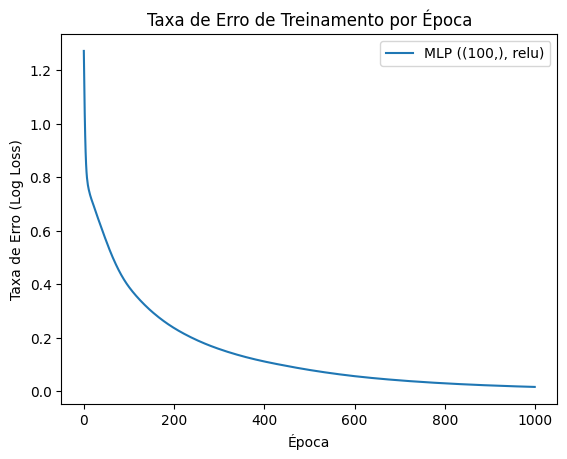

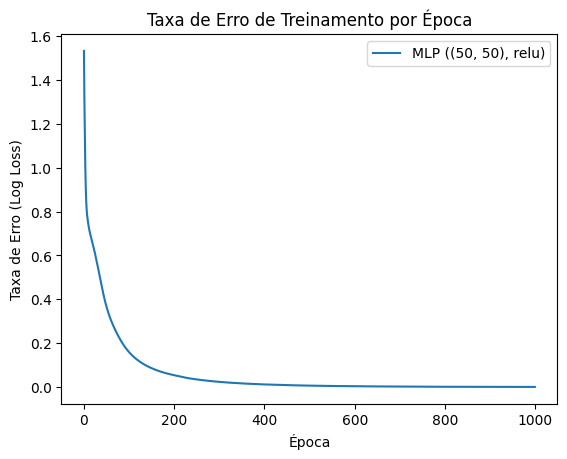

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# Função para treinar MLP e plotar a taxa de erro
def train_mlp_with_error_plot(X_train, y_train, hidden_layer_sizes=(100,), activation='relu', max_epochs=1000):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=1, warm_start=True, random_state=42)
    errors = []

    for epoch in range(max_epochs):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        y_pred = model.predict_proba(X_train)
        error = log_loss(y_train, y_pred)
        errors.append(error)

    # Plotar a taxa de erro
    plt.plot(range(max_epochs), errors, label=f"MLP ({hidden_layer_sizes}, {activation})")
    plt.xlabel("Época")
    plt.ylabel("Taxa de Erro (Log Loss)")
    plt.title("Taxa de Erro de Treinamento por Época")
    plt.legend()
    plt.show()

# Aplicar para Car Evaluation
print("Car Evaluation:")
train_mlp_with_error_plot(X_train, y_train, hidden_layer_sizes=(100,), activation='relu')
train_mlp_with_error_plot(X_train, y_train, hidden_layer_sizes=(50, 50), activation='relu')
train_mlp_with_error_plot(X_train, y_train, hidden_layer_sizes=(100,), activation='tanh')
train_mlp_with_error_plot(X_train, y_train, hidden_layer_sizes=(50, 50), activation='tanh')

In [39]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Função para calcular a taxa de erro/acerto
def calculate_error_rates(models, X, y, k=10):
    results = []

    def run_kfold_cv(model, X, y, k=10):
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        scores = []
        for train_index, test_index in kf.split(X):
            X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
            y_train_fold, y_test_fold = y[train_index], y[test_index]
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict(X_test_fold)
            scores.append(accuracy_score(y_test_fold, y_pred_fold))
        return np.mean(scores), np.std(scores)

    for model_name, model in models.items():
        mean_acc, std_acc = run_kfold_cv(model, X, y, k=k)
        error_rate = 1 - mean_acc
        results.append({
            "Algoritmo": model_name,
            "Taxa de Acerto (%)": mean_acc * 100,
            "Taxa de Erro (%)": error_rate * 100,
            "Desvio Padrão (%)": std_acc * 100
        })

    return pd.DataFrame(results)

# Definir os modelos
models = {
    "Árvore de Decisão (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Árvore de Decisão (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "kNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "kNN (k=10)": KNeighborsClassifier(n_neighbors=10),
    "MLP (100, relu)": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=10000, random_state=42),
    "MLP (50, 50, relu)": MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=10000, random_state=42),
    "MLP (100, tanh)": MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=10000, random_state=42),
    "MLP (50, 50, tanh)": MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', max_iter=10000, random_state=42),
    "K-Means": KMeans(n_clusters=len(np.unique(y_encoded)), random_state=42)
}

# Calcular taxas de erro/acerto para Car Evaluation
print("Car Evaluation:")
results_car_evaluation = calculate_error_rates(models, X_normalized, y_encoded)
print(results_car_evaluation)

Car Evaluation:
                     Algoritmo  Taxa de Acerto (%)  Taxa de Erro (%)  \
0     Árvore de Decisão (Gini)           98.031994          1.968006   
1  Árvore de Decisão (Entropy)           98.321683          1.678317   
2                    kNN (k=5)           88.248420         11.751580   
3                   kNN (k=10)           87.382377         12.617623   
4              MLP (100, relu)           99.015997          0.984003   
5           MLP (50, 50, relu)           98.437626          1.562374   
6              MLP (100, tanh)           98.436954          1.563046   
7           MLP (50, 50, tanh)           99.362482          0.637518   
8                      K-Means           24.951270         75.048730   

   Desvio Padrão (%)  
0           1.041372  
1           0.874868  
2           3.408329  
3           2.862157  
4           0.452845  
5           1.002762  
6           0.735073  
7           0.547993  
8           9.042069  
